In [2]:
from skmob.measures.individual import real_entropy, uncorrelated_entropy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skmob
import matplotlib.dates as mdates

In [7]:
data = pd.read_csv("mandagsmagi.csv", index_col=0)

In [8]:
data = data.drop_duplicates(subset=["page_id"])

In [107]:
data["ad_creation_time"] = pd.to_datetime(data["ad_creation_time"])

In [108]:
data["year"] = data["ad_creation_time"].dt.year
data["month"] = (
    pd.to_datetime(data["ad_creation_time"], format="%m").dt.month_name().str[:3]
) # not needed

In [4]:
data = data.drop([
        "ad_creative_body",
        "spend",
        "impressions",
        "delivery_by_region",
        "demographic_distribution",
        "bylines",
        "spend_lo",
        "spend_hi",
        "impressions_lo",
        "impressions_hi",
    ],
    axis=1,
)

In [22]:
data.year.unique()

array([2020, 2019, 2018, 2021, 2017, 2016], dtype=int32)

In [50]:
entropy_results = []

# group together: user, year, and month to calculate entropy on
for (politician, year, month), group_data in data.groupby(["page_id", "year", "month"]):

    # scikit mobility code
    group_data["top_label_int"] = (
        pd.factorize(group_data["top_label"], sort=True)[0] + 1
    )
    group_data["lat"] = 0.0 #placeholder

    tdf = skmob.TrajDataFrame(
        group_data,
        latitude="lat",
        longitude="top_label_int",
        datetime="ad_creation_time",
        user_id="page_id",
    )

    # calc entropy -> monthly data
    ue_df = uncorrelated_entropy(tdf, normalize=False)
    #re_df = real_entropy(tdf) 

    # Append the result with user, year, month, and calculated entropy
    entropy_results.append(
        {
            "user_id": politician,
            "year": year,
            "month": month,
            "entropy": ue_df["uncorrelated_entropy"].iloc[
                0
            ],  # First row if one result per user
        }
    )

entropy_df = pd.DataFrame(entropy_results)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 72.17it/s]

           user_id  year month   entropy
0     182567716746  2021   Oct  0.000000
1  174750213023790  2018   Aug  1.370951
2  174750213023790  2018   Nov  0.918296
3  174750213023790  2018   Oct  0.918296
4  174750213023790  2018   Sep  1.905639
5  174750213023790  2020   Jul  0.000000


In [3]:
monthly_uncor = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/monthly_uncor.csv",
    names=["user_id", "year", "month", "uncor entropy"],
    header=None,
)

In [4]:
monthly_real = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/entrop/monthly_real.csv",
    names=["user_id", "year", "month", "uncor entropy"],
    header=None,
)

In [5]:
monthly_real.head(5)

user_id  year month  uncor entropy
0  5962789983  2021   Apr       0.792481
1  5962789983  2021   Jul       1.142857
2  5962789983  2021   Mar       0.000000
3  6170309302  2018   Aug       1.142857
4  6170309302  2018   Jul       0.000000

## merging with data csv to retrieve party info

In [9]:
merged_uncor = monthly_uncor.merge(data, left_on='user_id', right_on="page_id",how='left')
merged_real = monthly_real.merge(
    data, left_on="user_id", right_on="page_id", how="left"
)

In [10]:
uncor_d = merged_uncor[merged_uncor["party"] == "Democrat"]
uncor_r = merged_uncor[merged_uncor["party"] == "Republican"]
real_d = merged_real[merged_real["party"] == "Democrat"]
real_r = merged_real[merged_real["party"] == "Republican"]

In [11]:
# go back to month numbers "Jan" = 1, "Feb" = 2)
uncor_d["month"] = pd.to_datetime(uncor_d["month"], format="%b").dt.month
uncor_d["date"] = pd.to_datetime(uncor_d[["year", "month"]].assign(day=1))
uncor_r["month"] = pd.to_datetime(uncor_r["month"], format="%b").dt.month
uncor_r["date"] = pd.to_datetime(uncor_r[["year", "month"]].assign(day=1))

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_18883/1128760156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncor_d["month"] = pd.to_datetime(uncor_d["month"], format="%b").dt.month
/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_18883/1128760156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncor_d["date"] = pd.to_datetime(uncor_d[["year", "month"]].assign(day=1))
/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_18883/1128760156.py:4: SettingWithCopyWarning: 


In [12]:
real_d["month"] = pd.to_datetime(real_d["month"], format="%b").dt.month
real_d["date"] = pd.to_datetime(real_d[["year", "month"]].assign(day=1))
real_r["month"] = pd.to_datetime(real_r["month"], format="%b").dt.month
real_r["date"] = pd.to_datetime(real_r[["year", "month"]].assign(day=1))

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_18883/686553802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_d["month"] = pd.to_datetime(real_d["month"], format="%b").dt.month
/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_18883/686553802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_d["date"] = pd.to_datetime(real_d[["year", "month"]].assign(day=1))
/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_18883/686553802.py:3: SettingWithCopyWarning: 
A value

## to-do make nicer plot for a single politician for report

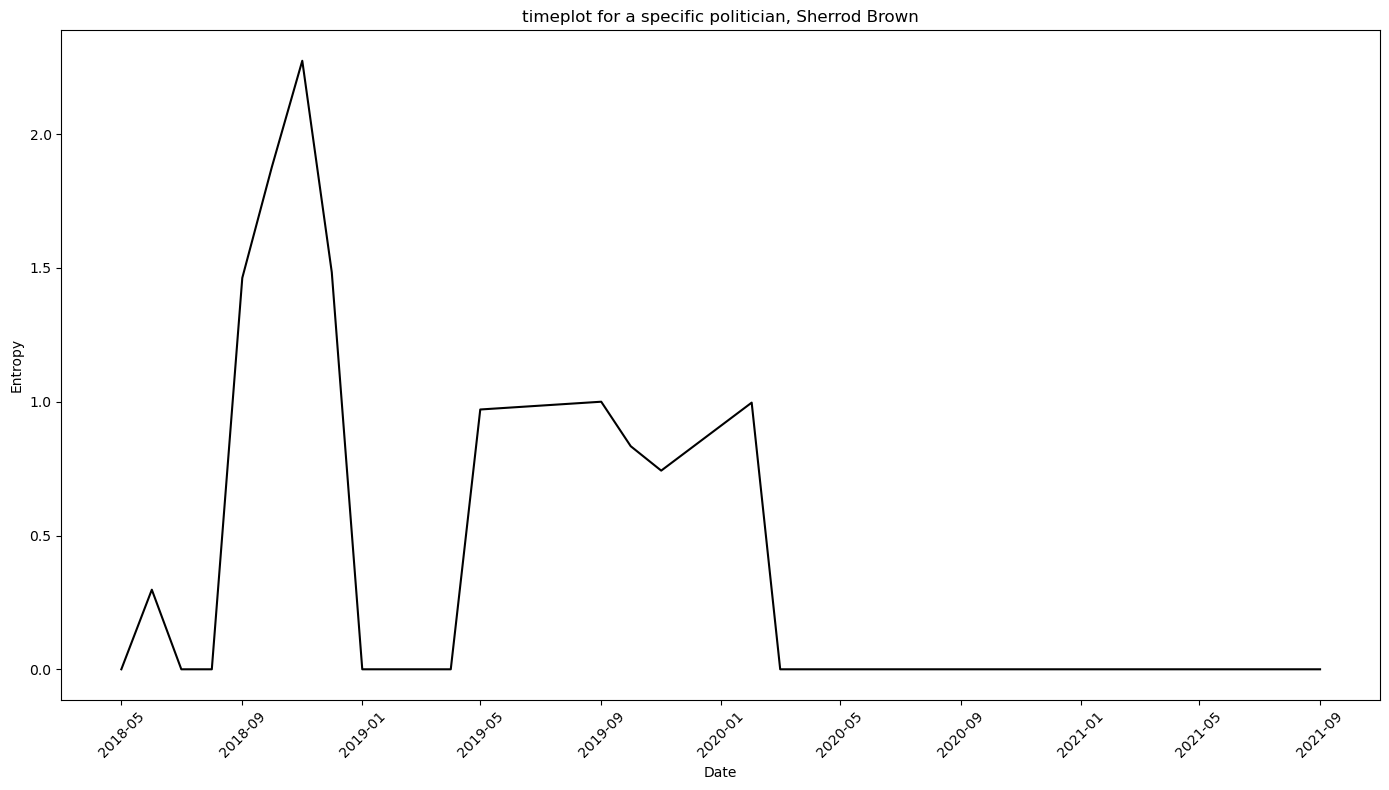

In [13]:
# filtered_df = uncor[(uncor["date"].dt.year == 2020) & (uncor["date"].dt.month == 2)]
filtered_df = uncor_d[uncor_d["user_id"] == 6266829799]

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df, x="date", y="uncor entropy", color="black")

plt.title("timeplot for a specific politician, Sherrod Brown")
plt.xlabel("Date")
plt.ylabel("Entropy")
#plt.legend(
#    title="politician id", bbox_to_anchor=(1.05, 1), loc="upper left"
#)  # Puts legend outside the plot
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [43]:
# guick check for a given month (Feb 2018 who has few datapoints) -> looks good
january_data = uncor_r[uncor_r["date"].dt.to_period("M") == "2018-01"]

# users grouped together
top_contributors = (
    january_data.groupby("page_id")["uncor entropy"].sum().sort_values(ascending=False)
)
print(top_contributors.head(5))

page_id
471928596287830    2.584963
239866352781313    1.298795
Name: uncor entropy, dtype: float64


/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_1696/2926491886.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")  # Puts legend outside the plot


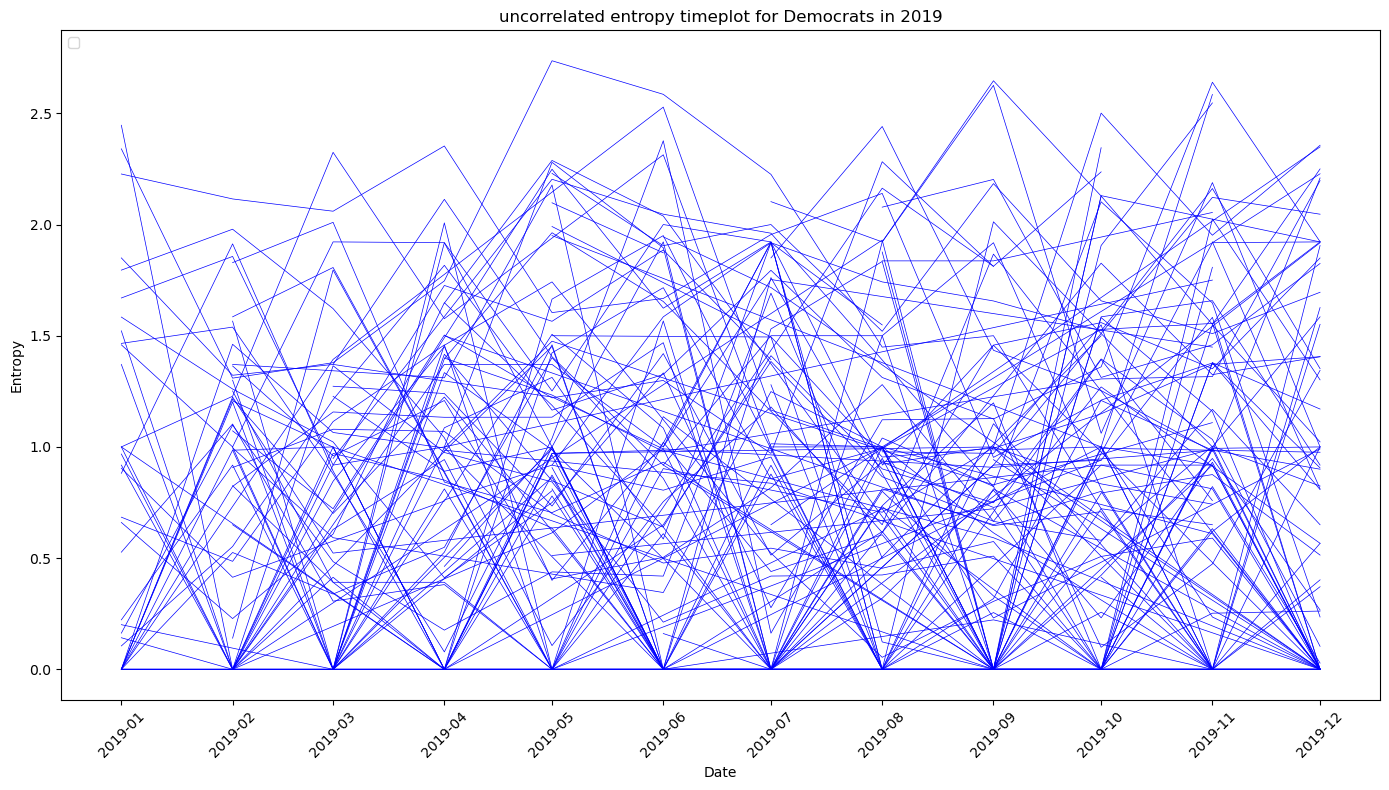

In [69]:
filtered_df = uncor_d[uncor_d["year"] == 2019]
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_df,
    x="date",
    y="uncor entropy",
    hue=None,
    units="user_id",
    color="blue",
    estimator=None,
    # palette="Reds",
    linewidth=0.5,
)

plt.title("uncorrelated entropy timeplot for Democrats in 2019")
plt.xlabel("Date")
plt.ylabel("Entropy")


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

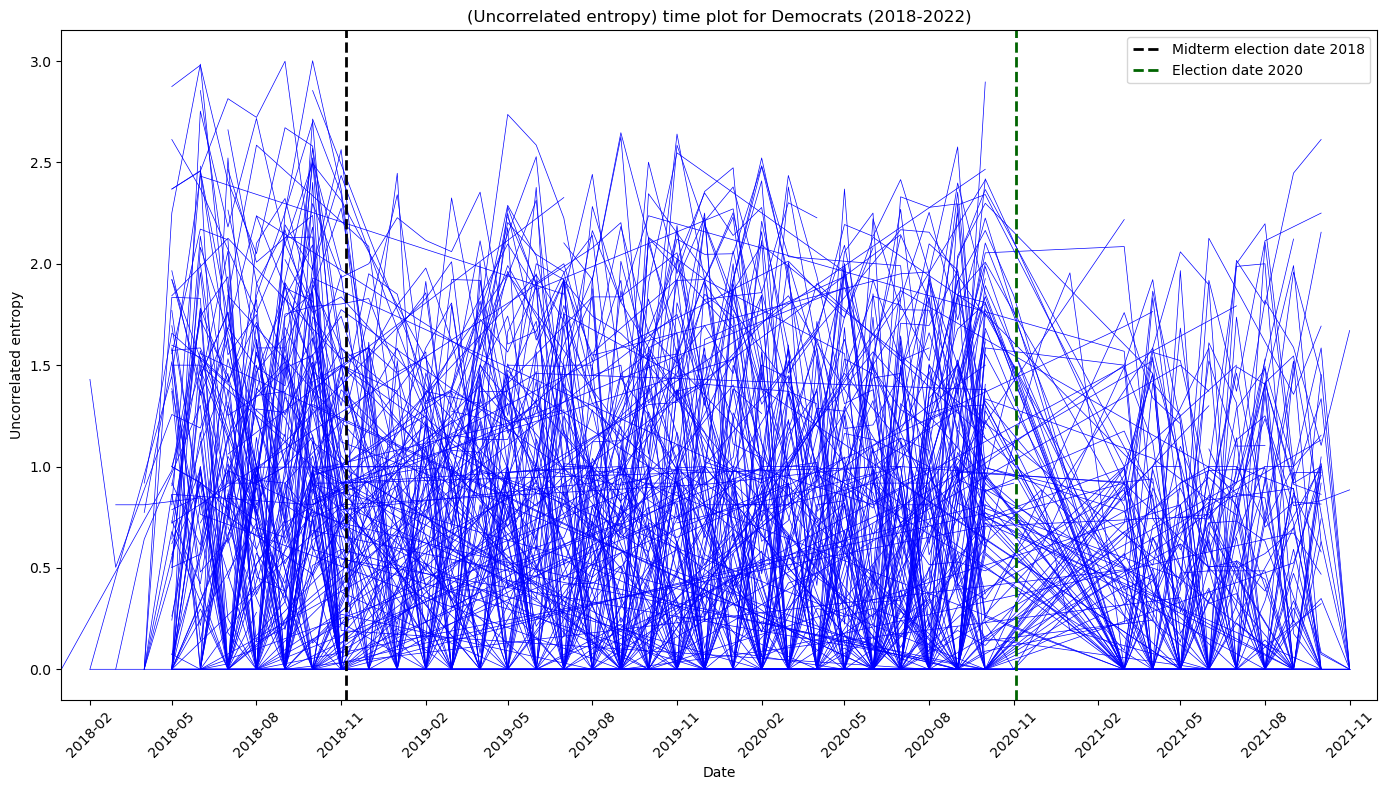

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# don't want 2016+2017, filter away 2018 to 2022
filtered_df = uncor_d[(uncor_d["year"] >= 2018) & (uncor_d["year"] <= 2022)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_df,
    x="date",
    y="uncor entropy",
    units="user_id",
    estimator=None,
    color="blue",
    linewidth=0.5,
)

plt.title("(Uncorrelated entropy) time plot for Democrats (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Uncorrelated entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)

plt.xlim(pd.Timestamp("2018-01"), pd.Timestamp("2021-12"))
plt.legend()
plt.tight_layout()

plt.show()

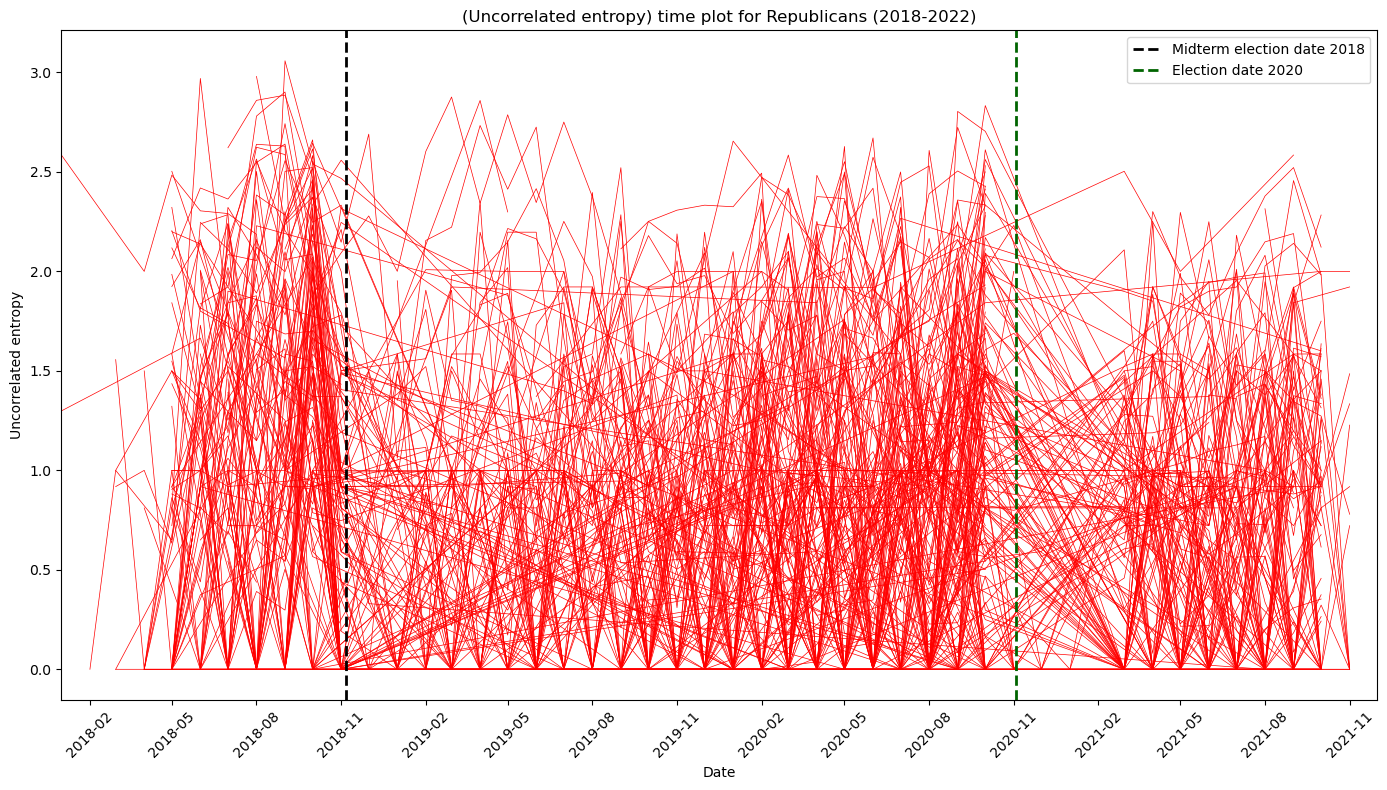

In [58]:
# don't want 2016+2017, filter away 2018 to 2022
filtered_r = uncor_r[(uncor_r["year"] >= 2018) & (uncor_r["year"] <= 2022)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_r,
    x="date",
    y="uncor entropy",
    units="user_id",
    estimator=None,
    color="red",
    linewidth=0.5,
)

plt.title("(Uncorrelated entropy) time plot for Republicans (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Uncorrelated entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)
plt.xlim(pd.Timestamp("2018-01"), pd.Timestamp("2021-12"))

plt.legend()
plt.tight_layout()

plt.show()

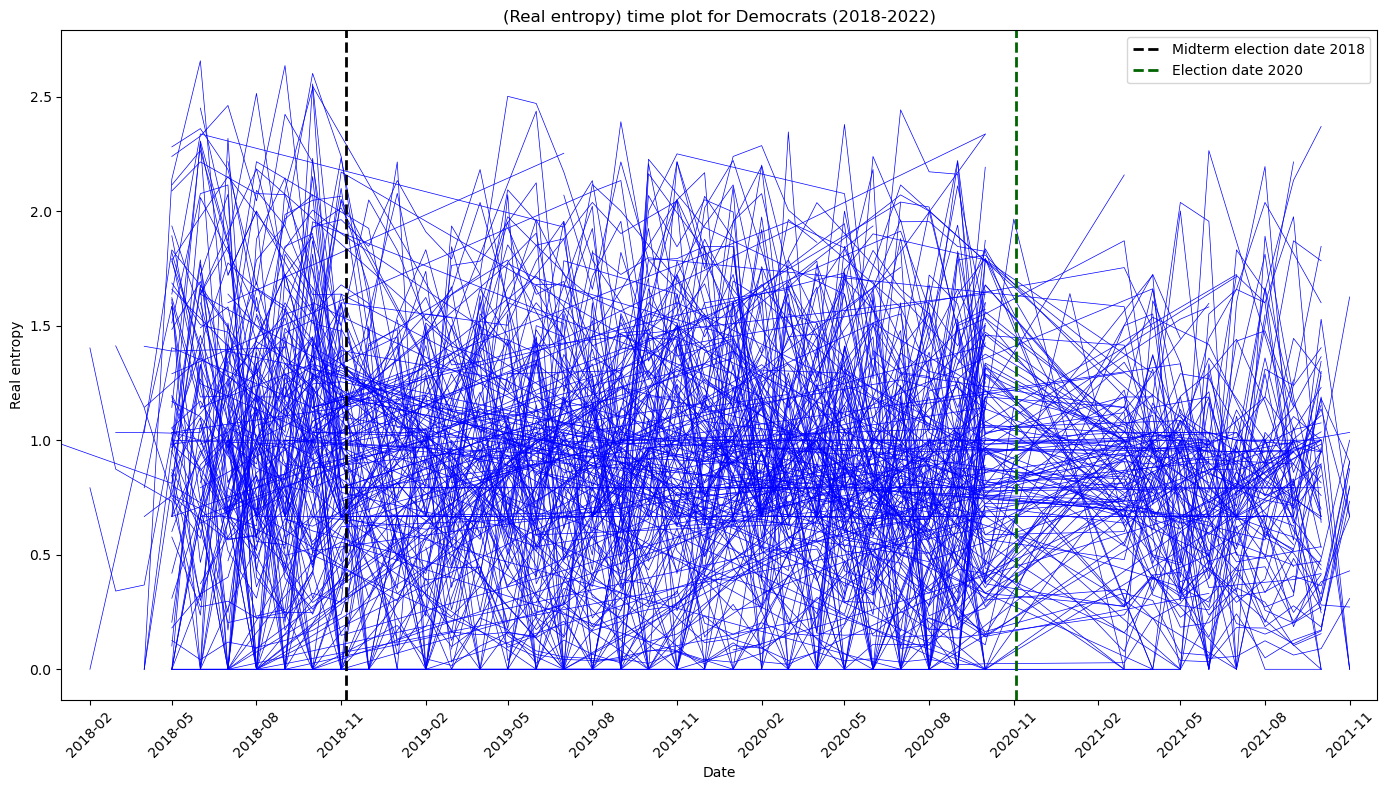

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# don't want 2016+2017, filter away 2018 to 2022
filtered_df = real_d[(real_d["year"] >= 2018) & (real_d["year"] <= 2022)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_df,
    x="date",
    y="uncor entropy",
    units="user_id",
    estimator=None,
    color="blue",
    linewidth=0.5,
)

plt.title("(Real entropy) time plot for Democrats (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Real entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)
plt.xlim(pd.Timestamp("2018-01"), pd.Timestamp("2021-12"))

plt.legend()
plt.tight_layout()

plt.show()

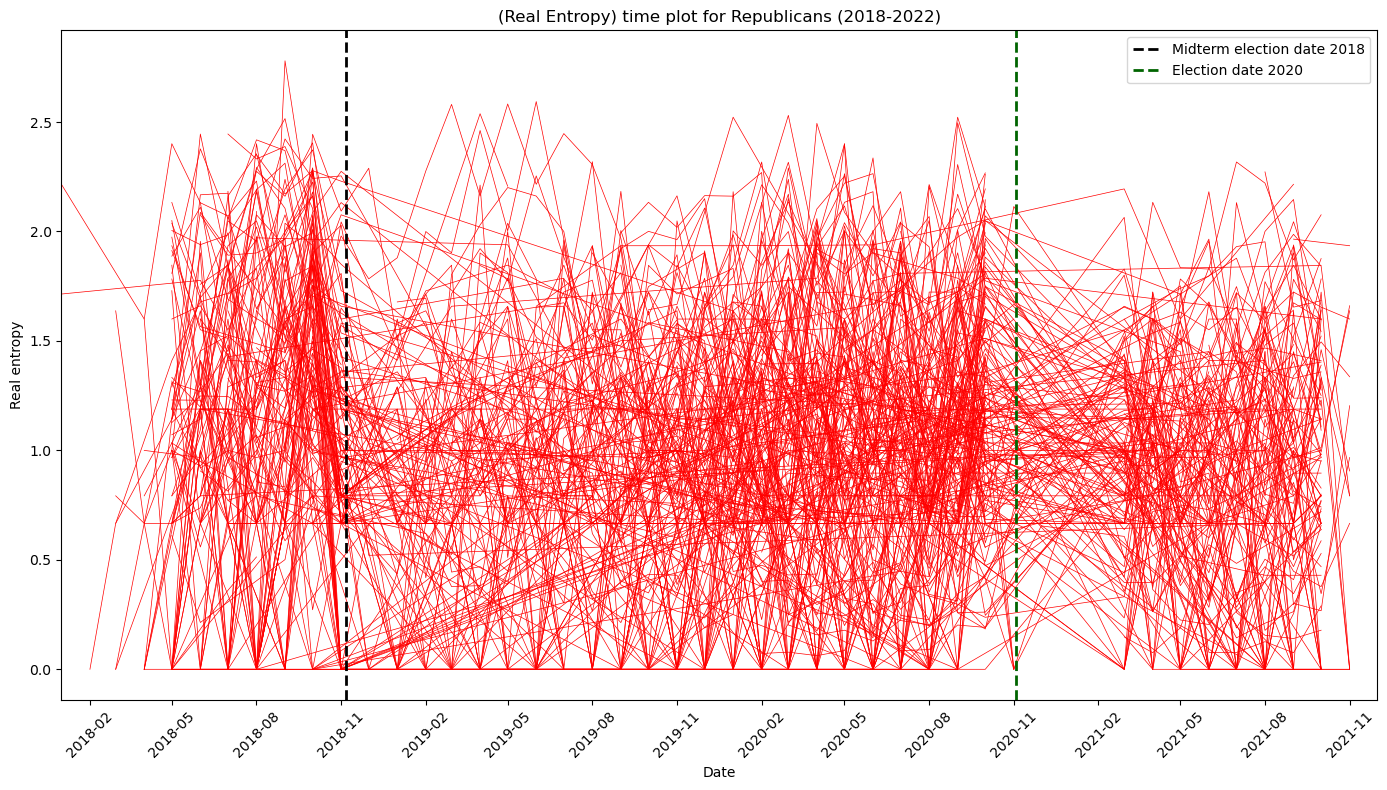

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# don't want 2016+2017, filter away 2018 to 2022
filtered_r = real_r[(real_r["year"] >= 2018) & (real_r["year"] <= 2022)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_r,
    x="date",
    y="uncor entropy",
    units="user_id",
    estimator=None,
    color="red",
    linewidth=0.5,
)

plt.title("(Real Entropy) time plot for Republicans (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Real entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)

plt.xlim(pd.Timestamp("2018-01"), pd.Timestamp("2021-12"))

plt.legend()
plt.tight_layout()

plt.show()